In [5]:
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
# import plotly.plotly as py
import plotly.tools as tls
import IPython
import sklearn
import tensorflow as tf
import nltk

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()
import os
import json

print(
"""{}-{:02d}-{:02d} {:02d}:{:02d}:{:02d}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
plotly\t\t{}
----------------------
ipython\t\t{}
----------------------
sklearn\t\t{}
tensorflow\t{}
nltk\t\t{}"""
    .format(dt.year, dt.month, dt.day, 
            dt.hour, dt.minute, dt.second, 
            np.__version__, 
            scipy.__version__, 
            pd.__version__, 
            matplotlib.__version__, 
            plotly.__version__,
            IPython.__version__, 
            sklearn.__version__, 
            tf.__version__,
            nltk.__version__))

c = {'b': '#1f77b4', #blue
     'o': '#ff7f0e', #orange
     'g': '#2ca02c', #green
     'r': '#d62728', #red
     'v': '#9467bd', #violet
     'br': '#8c564b', #brown
     'p': '#e377c2', #pink
     'gr': '#7f7f7f', #grey
     'y': '#bcbd22', #yellow
     'c': '#17becf'} #cyan

2021-10-23 02:18:05
----------------------
numpy		1.19.2
scipy		1.6.2
pandas		1.2.2
matplotlib	3.3.2
plotly		5.3.1
----------------------
ipython		7.22.0
----------------------
sklearn		0.24.1
tensorflow	2.0.0
nltk		3.5


In [6]:
plotly.tools.set_credentials_file(username='shumez', api_key='0sOs8ilJtT7yxpwa88Me')
py.sign_in('shumez', '0sOs8ilJtT7yxpwa88Me')

AttributeError: module 'plotly.tools' has no attribute 'set_credentials_file'

In [7]:
# https://plotly.com/python/getting-started-with-chart-studio/
import plotly
# import plotly.plotly as py
# !pip install chart_studio
import chart_studio.plotly as py
# import plotly.tools as tls
import chart_studio.tools as tls


tls.set_credentials_file(username='shumez', api_key='0sOs8ilJtT7yxpwa88Me')

py.sign_in('shumez', '0sOs8ilJtT7yxpwa88Me')

In [3]:
# def mkana():
#     dt = datetime.datetime.now()
#     ana_name = '{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
#     dir_ana = 'analysis/{}'.format(ana_name)
#     dir_ana_plot = '{}/plot'.format(dir_ana)
#     os.mkdir(dir_ana)
#     os.mkdir(dir_ana_plot)
    
#     return ana_name, dir_ana, dir_ana_plot

In [13]:
# df = pd.read_csv('data/councilor2019.csv')
# dat = pd.read_csv('data/data2019_{}.csv'.format('0716'))
dat = pd.read_csv('data/2021data.csv')
# dat_shitsumon = pd.read_csv('data/shitsumon.csv')
dat.head(5)
# dat_shitsumon.tail(10)

,ID,NAME,KANA,AGE,PIC,PARTY,PREFEC,DISTRICT,PRBLOCK,Q2_1,...,SQ8_7,SQ8_8,SQ8_9,SQ8_10,SQ8_11,SQ8_12,SQ8_13,SQ8_14,SQ8_15,SQ8_16
0,id_00002KAE,小林 悟,こばやし さとる,57,P_20211018SNSA0003S,5,1.0,1.0,NaN,3,...,1,0,0,0,1,1,0,1,0,0
1,id_00000FJJ,道下 大樹,みちした だいき,45,P_20210910SNSA0006S,2,1.0,1.0,NaN,2,...,66,66,66,66,66,66,66,66,66,66
2,id_ZZZZZ1J6,船橋 利実,ふなはし としみつ,60,P_20210921SNSA0011S,1,1.0,1.0,NaN,2,...,1,1,0,0,0,0,1,1,0,0
3,id_00002KWQ,高橋 祐介,たかはし ゆうすけ,41,P_20211011SNSA0018S,1,1.0,2.0,NaN,2,...,1,0,0,0,0,0,0,1,0,0
4,id_ZZZZZ04J,松木 謙公,まつき けんこう,62,P_20211015SNSA0021S,2,1.0,2.0,NaN,2,...,66,66,66,66,66,66,66,66,66,66


In [12]:
np.max(dat['Q2_1'])

99

In [19]:
# corona virus: 1-8
dat_cv = dat.iloc[:, 9:11]
# topics: 5-scale
dat_5s = dat.iloc[:, 12:36]
# constitution: one-hot
dat_co = dat.iloc[:, 37:]


# replace
dat_cv = dat_cv.replace(0, np.nan)
dat_cv = dat_cv.replace(66, np.nan)
dat_cv = dat_cv.replace(99, np.nan)

dat_5s = dat_5s.replace(66, np.nan)
dat_5s = dat_5s.replace(99, np.nan)

dat_co = dat_co.replace(66, np.nan)
dat_co = dat_co.replace(99, np.nan)



X = pd.concat([dat_5s, dat_co], axis=1)
dat_y = pd.concat([dat.iloc[:, 0:2], dat.iloc[:, 3], dat.iloc[:, 5:8]], axis=1)
dat_ = pd.concat([dat_y, X], axis=1)
# dat_ = pd.concat([dat.iloc[:, 1:4], dat_5scale, dat_5scale1], axis=1)

dat_.tail(5)
# dat_2scale.tail(5)

,ID,NAME,AGE,PARTY,PREFEC,DISTRICT,Q6_1,Q6_2,Q6_3,Q6_4,...,SQ8_7,SQ8_8,SQ8_9,SQ8_10,SQ8_11,SQ8_12,SQ8_13,SQ8_14,SQ8_15,SQ8_16
1053,id_00001U09,出口 慎太郎,39,2,NaN,NaN,2.0,3.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,id_00001MHO,大川 富洋,39,2,NaN,NaN,3.0,5.0,4.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1055,id_00002LPK,川西 義人,48,2,NaN,NaN,1.0,5.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056,id_00000476,田村 貴昭,60,4,NaN,NaN,5.0,5.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057,id_00002LNI,前野 真実子,37,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# dat_q = pd.concat([dat_shitsumon.iloc[:25, :], dat_shitsumon.iloc[42:, :]], axis=0)
# dat_q.tail(10)
# len(dat_q)

,Q,Title,HTML
24,Q7,憲法改正,いまの憲法を変える必要があると思いますか
42,Q8_1,女性天皇,女性も天皇になれるようにした方がよい
43,Q8_2,女系天皇,母方だけに天皇の血を引く「女系」天皇を認めてもよい
44,Q8_3,女性宮家,結婚後も女性皇族が皇室にとどまる「女性宮家」を創設できるようにすべきだ
45,Q8_4,皇族復帰,戦後に皇籍を離脱した「旧宮家」の男性が皇族に復帰できるようにすべきだ
46,Q9_1,アベノミクス,【安倍内閣】経済政策全般（アベノミクス）
47,Q9_2,外交全般,【安倍内閣】外交政策全般
48,Q9_3,北方領土問題,【安倍内閣】北方領土問題への取り組み
49,Q9_4,日韓問題,【安倍内閣】日韓問題への対応
50,Q9_5,統計不正,【安倍内閣】統計不正


In [16]:
df_LDP = df[df['Party'] == 'LDP']
df_KMI = df[df['Party'] == 'Koumei']
df_ISI = df[df['Party'] == 'Ishin']

df_CDP = df[df['Party'] == 'CDP']
df_DPP = df[df['Party'] == 'DPFP']
df_SDP = df[df['Party'] == 'SDP']
df_JCP = df[df['Party'] == 'JCP']
# df['Party']


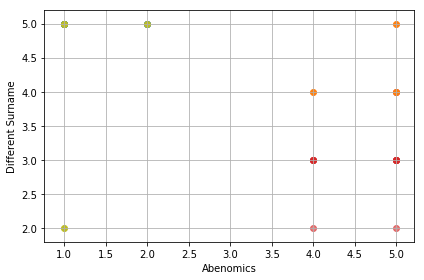

In [17]:
fig, ax = plt.subplots()

ax.scatter(df_LDP['Abenomics'], df_LDP['DifferentSurname'], c=c['r'], alpha=.6)
ax.scatter(df_KMI['Abenomics'], df_KMI['DifferentSurname'], c=c['o'])
ax.scatter(df_CDP['Abenomics'], df_CDP['DifferentSurname'], c=c['b'], alpha=.6)
ax.scatter(df_DPP['Abenomics'], df_DPP['DifferentSurname'], c=c['y'])
ax.set(xlabel='Abenomics', 
       ylabel='Different Surname')
ax.grid(True)
plt.tight_layout()
plt.show()

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


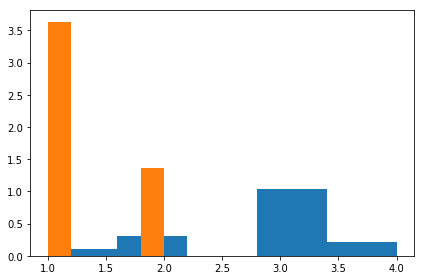

In [30]:
fig, ax = plt.subplots()

ax.hist(df_LDP['PrivacyRights'], bins=5, density=True, align='mid')
ax.hist(df_CDP['PrivacyRights'], bins=5, density=True, align='mid')
# ax.hist2d(df_LDP['Abenomics'], df_LDP['PrivacyRights'], bins=[5, 5])
plt.tight_layout()
plt.show()

In [54]:
# fig, ax = plt.subplots()

# ax.hist(df['Abenomics'], 5, density=False, labels=df['Party'])
# ax.hist(df_CDP['Abenomics'])

# scatter
# ax.scatter(df_CDP['Abenomics'], df_CDP['Diplomacy'], color=c['b'])
# ax.scatter(df_LDP['Abenomics'], df_LDP['Diplomacy'], color=c['r'])
# ax.scatter(df_DPFP['Abenomics'], df_DPFP['Diplomacy'], color=c['y'])
# ax.scatter(df_JCP['Abenomics'], df_JCP['Diplomacy'], color=c['v'])

# violin
# ax.violinplot(df)

ax.boxplot(df['Abenomics'], labels=df['Party'])

ax.grid(True)
plt.tight_layout()
plt.show()

ValueError: Dimensions of labels and X must be compatible

In [52]:
dat_ = dat_.dropna(thresh=15)

# df = df.dropna(thresh=10)
# dat_ = dat_.dropna(thresh=15)

# X = pd.concat([df.iloc[:, 2:4], df.iloc[:, 6:]], axis=1)
# X = pd.concat([df.iloc[:, 3], df.iloc[:, 6:]], axis=1)
# X = pd.concat([dat_.iloc[:, 0:1], dat_.iloc[:, 2:]], axis=1)
# X = dat_.iloc[:, 3:]
# X = pd.concat([dat_.iloc[:, 1], dat_.iloc[:, 3:]], axis=1)

# y = df.iloc[:, 4]
# y_gen = df.iloc[:, 2]
# y_age = df.iloc[:, 3]
# y_gen.tail()
X = dat_.iloc[:, 6:]
y = dat_.iloc[:, :6]
# y_gen

# questions = X.columns.values
# len(X)
X.tail(5)
y.tail(5)
y_party = dat_.iloc[:, 3]
y_party.tail(5)

1052    9
1053    2
1054    2
1055    2
1056    4
Name: PARTY, dtype: int64

In [65]:
y.tail(5)

,ID,NAME,AGE,PARTY,PREFEC,DISTRICT
1052,id_00002IG1,斉藤 健一郎,40,9,NaN,NaN
1053,id_00001U09,出口 慎太郎,39,2,NaN,NaN
1054,id_00001MHO,大川 富洋,39,2,NaN,NaN
1055,id_00002LPK,川西 義人,48,2,NaN,NaN
1056,id_00000476,田村 貴昭,60,4,NaN,NaN


In [5]:
# X['Gender'] = X['Gender'].replace('F', 1)
# X['Gender'] = X['Gender'].replace('M', 0)

# X[X['Gender']=='M', 0] = 0
# X.tail()
# gender_le

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(categorical_features=[0])
# ohe.fit_transform(X).toarray()

,Gender,Age,Abenomics,Diplomacy,NourthernTerriories,SouthKorea,DefenceForce,JPUSSecurityArrangements,NorthKorea,PreemptiveStrike,...,ForeignWorker,PrivacyRights,DifferentSurname,SameSexMarriage,Redistricting,RestrictionOnParty,FemaleEmperor,MatrilinealEmperor,Miyake,ReturningImperialFamily
209,1,39,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,...,3.0,1.0,5.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0
210,0,78,5.0,5.0,4.0,5.0,4.0,4.0,4.0,3.0,...,3.0,3.0,4.0,3.0,1.0,5.0,4.0,NaN,NaN,NaN
211,0,49,4.0,5.0,4.0,4.0,4.0,3.0,3.0,4.0,...,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0
212,0,65,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,3.0,3.0,3.0,1.0
213,0,72,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,5.0,5.0,3.0,5.0,1.0,1.0,3.0,3.0


In [31]:
# preprocessing

# df = df.dropna()
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')#, axis=0)
imp = imp.fit(X.values)
Xi = imp.transform(X.values)

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Xs = sc.fit_transform(X)
Xis = sc.fit_transform(Xi)

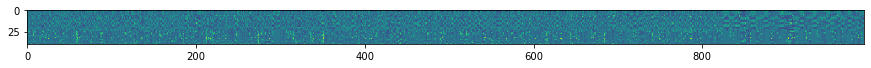

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(Xis.T, cmap='viridis')

In [60]:
parties = np.array([
    ['LDP', 'LDP', 'r', 'o', 1., '自民'],
    ['CDP', 'CDP', 'b', 'o', 2., '立憲'],
    ['Koumei', 'Koumei', 'o', 'o', 3., '公明'],
    ['JCP', 'JCP', 'g', 'o', 4., '共産'],
    ['Ishin', 'Ishin', 'y', 'o', 5., '維新'],
    ['DPFP', 'DPFP', 'c', 'o', 6., '国民'],
    ['SDP', 'SDP', 'v', 'o', 7., '社民'],
    ['NA', 'NA', 'gr', 'o', 8., ' '],
    ['NHK', 'NHK', 'gr', '^', 9., 'N党'],
    ['Reiwa', 'Reiwa', 'p', 'o', 10., 'れいわ'],
    ['Shoha', 'Shoha', 'gr', '^', 11., '諸派'],
    ['independent', 'Independent', 'br', 'o', 12., '無所属']
    # ['Kibou', 'Kibou', 'gr', '^', 8., '希望'],
    # ['Koufuku', 'Koufuku', 'gr', '^', 11., '幸福'],
    # ['Labour', 'Labour', 'gr', '^', 12., '労働'],
    # ['Olive', 'Olive', 'gr', '^', 15., 'オリーブ'],
    # ['Anrakushi', 'Anrakushi', 'gr', '^', 16., '安楽死']
])
    
#     ['Nihonmutouhatou', 'Nihonmutouhatou', 'br', '^'], 
# ])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
# lr = LogisticRegression()

# X_pca2 = pca2.fit_transform(X)
# Xs_pca2 = pca2.fit_transform(Xs)
Xis_pca2 = pca2.fit_transform(Xis)
Xis_pca3 = pca3.fit_transform(Xis)

# dir_ana, dir_ana_plot = mkana()

In [51]:
Xis_pca2[2, 0]

3.5783526984988425

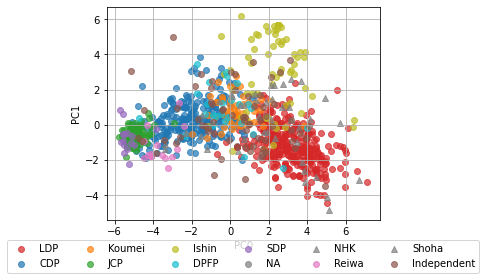

In [61]:
fig, ax = plt.subplots()

for party, i in zip(parties, range(12)):
    ax.scatter(Xis_pca2[y_party==i+1, 0], Xis_pca2[y_party==i+1, 1], label=party[1], c=c[party[2]], marker=party[3], alpha=.7)
    
ax.set(xlabel='PC0', ylabel='PC1')
ax.legend(loc='upper center', ncol=6, bbox_to_anchor=(0.5, -0.07))
ax.grid(True)

plt.tight_layout()
# plt.savefig('{}/PCA2.png'.format(dir_ana_plot))
plt.show()

NameError: name 'y_gen' is not defined

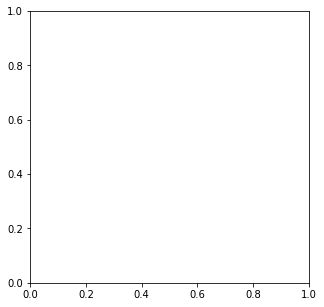

In [52]:
# X_train_pca

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(Xis_pca2[y_gen=='M', 0], Xis_pca2[y_gen=='M', 1], c=y_age[y_gen=='M'], cmap='viridis', marker='^', label='M')
ax.scatter(Xis_pca2[y_gen=='F', 0], Xis_pca2[y_gen=='F', 1], c=y_age[y_gen=='F'], cmap='viridis', marker='o', label='F')
ax.legend(loc='best')
ax.grid(True)
# ax[1].scatter(X_pca2[y_gen=='M', 0], X_pca2[y_gen=='M', 1], c=y_age[y_gen=='M'], cmap='viridis', marker='^', label='M')
# ax[1].scatter(X_pca2[y_gen=='F', 0], X_pca2[y_gen=='F', 1], c=y_age[y_gen=='F'], cmap='viridis', marker='o', label='F')
# ax[1].legend(loc='best')

plt.show()

In [63]:
print(type(Xis_pca2))
print(type(y))
y

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


0      11
1       1
2       6
3      12
4       1
5       4
6      16
7       5
8      13
9      13
10      1
11      4
12      3
13      1
14     13
15     13
16      1
17      4
18      1
19      3
20     13
21      1
22      3
23     13
24      1
25      3
26     13
27     13
28      7
29      4
       ..
339     7
340     7
341     9
342     9
343     9
344     9
345    10
346    10
347    10
348    10
350    10
351    10
352    10
353    10
354    11
355    11
356    11
357    13
358    13
359    13
360    13
361    12
362    12
363    12
364    12
365    15
366    15
367    15
368    15
369    16
Name: Party, Length: 344, dtype: int64

In [12]:
import plotly.graph_objs as go

data = []
for party, p in zip(parties, range(len(parties))):
    trance0 = go.Scatter(
        x = Xis_pca2[y==p+1, 0],
        y = Xis_pca2[y==p+1, 1],
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
#             symbol = party[3],
            line = dict(
                width = .2,
            ),
            opacity = .7
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    data.append(trance0)

layout = go.Layout(
    title = 'Principal Component Analysis',
    xaxis = dict(
        title = 'PC0'
    ), 
    yaxis = dict(
        title = 'PC1'
    ),
    showlegend = True
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca2')

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from app import app

data = []
for party, p in zip(parties, range(len(parties))):
    trance0 = go.Scatter(
        x = Xis_pca2[y==p+1, [0]],
        y = Xis_pca2[y==p+1, [1]],
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
#             symbol = party[3],
            opacity = .7
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0],
    )
    data.append(trance0)

layout = go.Layout(
    title = '',
    xaxis = dict(
        title = 'PC0'
    ), 
    yaxis = dict(
        title = 'PC1'
    ),
    showlegend = True
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca_2_interactive')

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

In [24]:
def plot(Q4_1, Q4_2, Q4_3, Q4_4, Q4_5, Q4_6, Q4_7, Q4_8, Q4_9, Q4_10, Q4_11, Q4_12, 
         Q5_1, Q5_2, Q5_3, Q5_4, Q5_5, Q5_6, Q5_7, 
         Q6_1, Q6_2, Q6_3, Q6_4, Q6_5, 
         Q7, 
         Q8_1, Q8_2, Q8_3, Q8_4, 
         Q9_1, Q9_2, Q9_3, Q9_4, Q9_5):
    Xe = pd.DataFrame(np.array([[
        Q4_1, Q4_2, Q4_3, Q4_4, Q4_5, Q4_6, Q4_7, Q4_8, Q4_9, Q4_10, Q4_11, Q4_12, 
        Q5_1, Q5_2, Q5_3, Q5_4, Q5_5, Q5_6, Q5_7, 
        Q6_1, Q6_2, Q6_3, Q6_4, Q6_5, 
        Q7, 
        Q8_1, Q8_2, Q8_3, Q8_4, 
        Q9_1, Q9_2, Q9_3, Q9_4, Q9_5]]))
    
    Xei = imr.transform(Xe.values)
    Xeis = sc.transform(Xei)
    Xeis_pca2 = pca2.transform(Xeis)
    
    
    fig, ax = plt.subplots(figsize=(8,8))

    # for party in parties:
    for party, p in zip(parties, range(16)):
        # ax.scatter(X_pca2[y==party[0], [0]], X_pca2[y==party[0], [1]], label=party[1], c=c[party[2]], marker=party[3])
        # ax.scatter(Xs_pca2[y==party[0], [0]], Xs_pca2[y==party[0], [1]], label=party[1], c=c[party[2]], marker=party[3])
        # ax.scatter(Xis_pca2[y==party[0], [0]], Xis_pca2[y==party[0], [1]], label=party[1], c=c[party[2]], marker=party[3])

        ax.scatter(Xis_pca2[y==p+1, [0]], Xis_pca2[y==p+1, [1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.7)
        #ax.scatter(Xis_pca2[y==party[4], [0]], Xis_pca2[y==party[4], [1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.7)
        
    ax.scatter(Xeis_pca2[:, [0]], Xeis_pca2[:, [1]], label='You', c='k', marker='x')

    ax.legend(loc='upper center', ncol=6, bbox_to_anchor=(0.5, -0.07))
    ax.set(xlabel='PC0', ylabel='PC1')
    # ax.set(xlim=(-10, 10), ylim=(-10,10))
    ax.grid(True)
    plt.tight_layout()
    # plt.savefig('{}/PCA2.png'.format(ana_name))
    plt.show()

    # plotly
    # plot_fig = tls.mpl_to_plotly(fig)
    # plot_url = py.plot_mpl(fig)

# plot(np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan)

from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(plot, 
         Q4_1=(1,5), Q4_2=(1,5), Q4_3=(1,5), Q4_4=(1,5), Q4_5=(1,5), Q4_6=(1,5), 
         Q4_7=(1,5), Q4_8=(1,5), Q4_9=(1,5), Q4_10=(1,5), Q4_11=(1,5), Q4_12=(1,5), 
         Q5_1=(1,5), Q5_2=(1,5), Q5_3=(1,5), Q5_4=(1,5), Q5_5=(1,5), Q5_6=(1,5), Q5_7=(1,5), 
         Q6_1=(1,5), Q6_2=(1,5), Q6_3=(1,5), Q6_4=(1,5), Q6_5=(1,5), 
         Q7=(1,5), 
         Q8_1=(1,5), Q8_2=(1,5), Q8_3=(1,5), Q8_4=(1,5), 
         Q9_1=(1,5), Q9_2=(1,5), Q9_3=(1,5), Q9_4=(1,5), Q9_5=(1,5))

interactive(children=(IntSlider(value=3, description='Q4_1', max=5, min=1), IntSlider(value=3, description='Q4…

<function __main__.plot(Q4_1, Q4_2, Q4_3, Q4_4, Q4_5, Q4_6, Q4_7, Q4_8, Q4_9, Q4_10, Q4_11, Q4_12, Q5_1, Q5_2, Q5_3, Q5_4, Q5_5, Q5_6, Q5_7, Q6_1, Q6_2, Q6_3, Q6_4, Q6_5, Q7, Q8_1, Q8_2, Q8_3, Q8_4, Q9_1, Q9_2, Q9_3, Q9_4, Q9_5)>

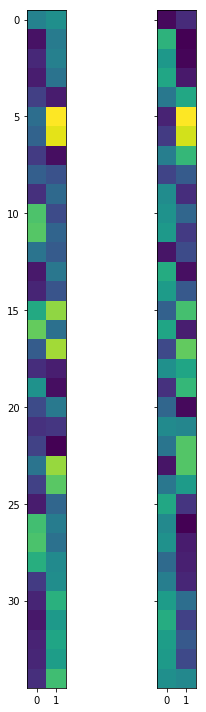

In [13]:
comp = pca2.components_
comp_abs = np.abs(comp)
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(5,10))
ax[0].imshow(comp.T)
ax[1].imshow(comp_abs.T)
# ax[0].set(yticks=np.arange(len(questions)), 
#           yticklabels=questions)
# ax.set(xticks=np.array(y))
plt.tight_layout()
# plt.savefig('{}/comp.png'.format(dir_ana_plot))
plt.show()

In [26]:
np.savetxt('{}/X.csv'.format(dir_ana), X, delimiter=',')
np.savetxt('{}/Xis.csv'.format(dir_ana), Xis, delimiter=',')
np.savetxt('{}/pca2.csv'.format(dir_ana), Xis_pca2, delimiter=',')
np.savetxt('{}/comp.csv'.format(dir_ana), comp, delimiter=',')
y.to_csv('{}/y.csv'.format(dir_ana), index=False)
dat_q.to_csv('{}/dat_q.csv'.format(dir_ana), index=False)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [194]:
dat_q.iloc[[3, 4, 5, 6, 14, 16, 17, 18, 20, 21, 22], 2]

3                        政府のサービスが悪化しても、お金のかからない小さな政府が良い
4                                       公共事業による雇用確保は必要だ
5                              歳出抑制より景気対策のために財政出動を行うべきだ
6                              全農の株式会社化など農協の組織改革を進めるべきだ
14    <span class="q_textA">Ａ</span>国内産業を保護すべきだ<br/>...
16    <span class="q_textA">Ａ</span>財政赤字を心配する必要なし<br...
17    <span class="q_textA">Ａ</span>経済的規制の緩和徹底<br/><...
18    <span class="q_textA">Ａ</span>一票の格差是正のため、参院選の「...
20                                  年金・医療費給付を現行水準より抑制する
21                            競争力のない産業・企業の保護を現行水準より削減する
22                       基礎的財政収支（プライマリーバランス）の均衡達成を先送りする
Name: HTML, dtype: object

In [14]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=3)

# X_pca3 = pca3.fit_transform(X)
# Xs_pca3 = pca3.fit_transform(Xs)
Xis_pca3 = pca3.fit_transform(Xis)

# dir_ana, dir_ana_plot = mkana()

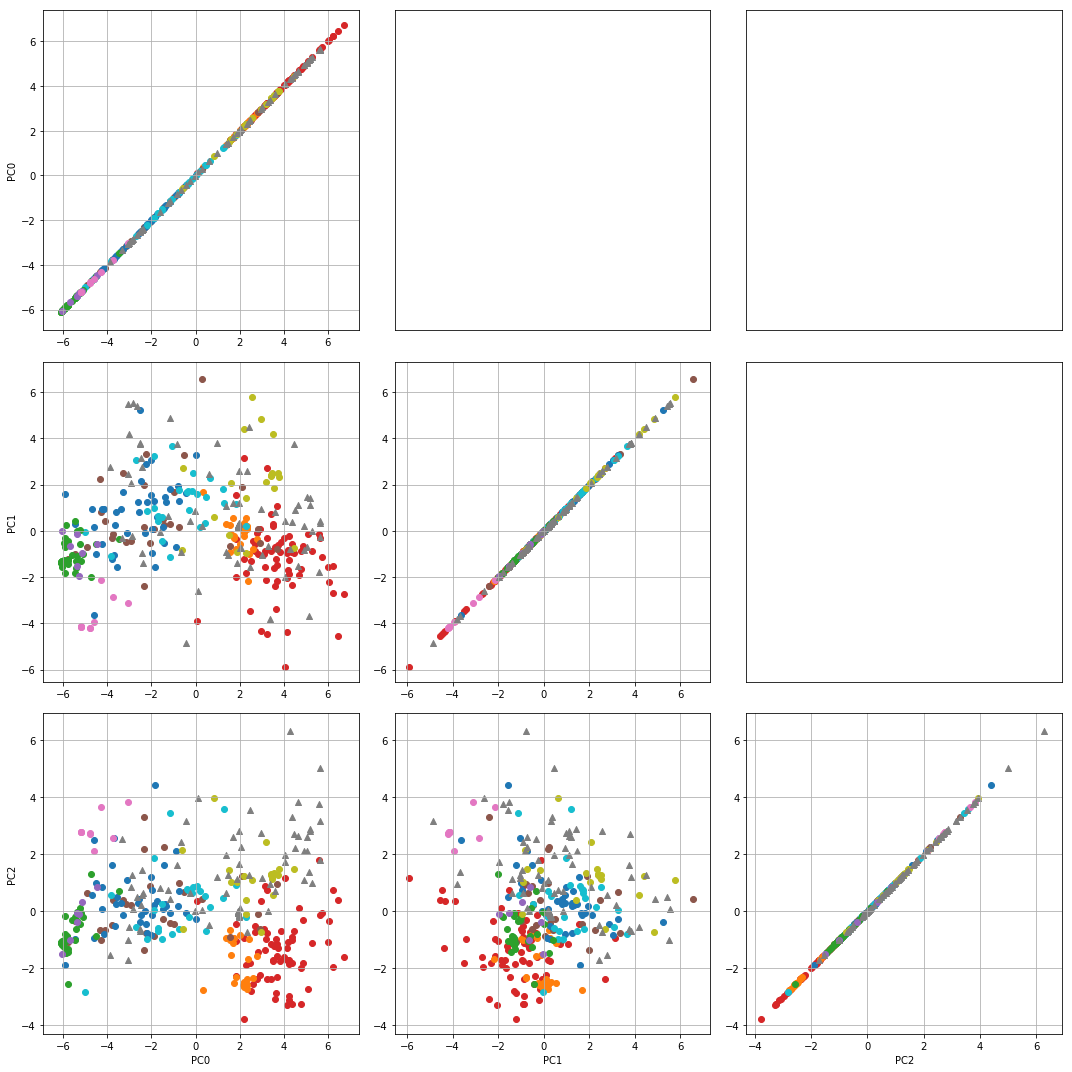

In [15]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    ax[2,i].set(xlabel=('PC%d' % i))
    ax[i,0].set(ylabel=('PC%d' % i))
    
    for j in range(3):
        if j >= i:
            # for party in parties:
            for party, p in zip(parties, range(16)):
                # ax[j,i].scatter(X_pca3[y==party[0], [i]], X_pca3[y==party[0], [j]], label=party[1], c=c[party[2]], marker=party[3])
                # ax[j,i].scatter(Xs_pca3[y==party[0], [i]], Xs_pca3[y==party[0], [j]], label=party[1], c=c[party[2]], marker=party[3])
                # ax[j,i].scatter(Xis_pca3[y==party[0], [i]], Xis_pca3[y==party[0], [j]], label=party[1], c=c[party[2]], marker=party[3])
                
                ax[j,i].scatter(Xis_pca3[y==p+1, i], Xis_pca3[y==p+1, j], label=party[1], c=c[party[2]], marker=party[3])
            ax[j,i].grid(True)
        #elif j == i:
            #for party in parties:
                #ax[j,i].violinplot(Xis_pca3[y==party[0], [i]], color=c[party[2]], alpha=.7)
            #ax[j,i].set(ylim=(0, 5))
            #ax[j,i].grid(True)
        elif j < i:
            ax[j,i].set(xticks=[], yticks=[])
#     print(yi[0])

#         ax[i,j].legend(loc='best')
        
# fig.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
# plt.savefig('{}/PCA3.png'.format(dir_ana_plot))
plt.show()

# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

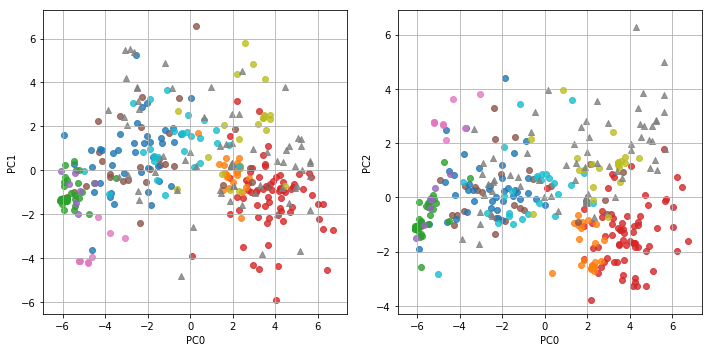

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

for ax, i in zip(axs, range(2)):
    # for party in parties:
    for party, p in zip(parties, range(16)):
        # ax.scatter(Xis_pca3[y==party[0], [0]], Xis_pca3[y==party[0], [i+1]], label=party[1], c=c[party[2]], marker=party[3])
        ax.scatter(Xis_pca3[y==p+1, 0], Xis_pca3[y==p+1, i+1], label=party[1], c=c[party[2]], marker=party[3], alpha=.8)
        ax.set(xlabel='PC0', ylabel='PC{}'.format(i+1))
    ax.grid(True)
#     if i == 0:
#         ax.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, -0.07))
plt.tight_layout()
# plt.savefig('{}/PCA3_2.png'.format(dir_ana_plot))
plt.show()

In [63]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

for ax, i in zip(axs, range(2)):
    # for party in parties:
    for party, p in zip(parties, range(16)):
        # ax.scatter(Xis_pca3[y==party[0], [0]], Xis_pca3[y==party[0], [i+1]], label=party[1], c=c[party[2]], marker=party[3])
        sc = ax.scatter(Xis_pca3[y==p+1, [0]], Xis_pca3[y==p+1, [i+1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.8)
        ax.set(xlabel='PC0', ylabel='PC{}'.format(i+1))
    ax.grid(True)
#     if i == 0:
#         ax.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, -0.07))
plt.tight_layout()
# plt.savefig('{}/PCA3_2.png'.format(ana_name))
plot_fig = tls.mpl_to_plotly(fig)
# py.iplot(plot_fig, filename='pca3_py')
plot_url = py.plot_mpl(fig)
plt.show()

In [130]:
import plotly.graph_objs as go

fig = tls.make_subplots(rows=1, cols=2)

data = []
l = []
for party, p in zip(parties, range(len(parties))):
    trace0 = go.Scatter(
        x = Xis_pca3[y==p+1, [0]],
        y = Xis_pca3[y==p+1, [1]],
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
            opacity = .7
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    trace1 = go.Scatter(
        x = Xis_pca3[y==p+1, [0]],
        y = Xis_pca3[y==p+1, [2]],
        xaxis = 'x2',
        yaxis = 'y2',
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
            opacity = .7
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 1, 2)

layout = go.Layout(
    title = '',
    xaxis = dict(
        title = 'PC0'
    ), 
    yaxis = dict(
        title = 'PC1'
    ),
    xaxis2 = dict(
        title = 'PC0'
    ),
    yaxis2 = dict(
        title = 'PC1'
    ),
    showlegend = False
)

# fig['layout'].up
# fig = go.Figure(data=l, layout = layout)
py.iplot(fig, filename='pca3')

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [17]:
import plotly.graph_objs as go

data = []

for party, p in zip(parties, range(len(parties))):
    trace0 = go.Scatter3d(
        x = Xis_pca3[y==p+1, 0],
        y = Xis_pca3[y==p+1, 1],
        z = Xis_pca3[y==p+1, 2],
        name = parties[p, 5],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Principal Component Analysis',
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
    
#     showlegend = True
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca3_3d')

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [20]:
import plotly.graph_objs as go

data = []

for party, p in zip(parties, range(len(parties))):
    trace0 = go.Scatter3d(
        x = Xis_pca3[y==p+1, [0]],
        y = Xis_pca3[y==p+1, [1]],
        z = Xis_pca3[y==p+1, [2]],
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Principal Component Analysis',
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
    
#     showlegend = True
)

####

import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

app.layout = html.Div(
    style={
        'backgroundColor': colors['background']
    }, 
    children = [
        html.H1(
            children = 'Principal Component Analysis',
            style = {
                'textAlign': 'center',
                'color': colors['text']
            }
        ),
        html.Label('slider'),
        dcc.Slider(
            min = 1,
            max = 5,
            marks = {i: str(i) for i in range(1, 6)},
            value = 5,
        ),
        html.Div(
            children = '',
            style = {
                'textAlign': 'center',
                'color': colors['text']
            }
        ),
        dcc.Graph(
            id = 'pca3',
            figure = {
                'data': [
                    go.Scatter3d(
                        x = Xis_pca3[y==p+1, [0]],
                        y = Xis_pca3[y==p+1, [1]],
                        z = Xis_pca3[y==p+1, [2]],
                        name = party[5],
                        mode = 'markers',
                        marker = dict(
                            color = c[party[2]],
                            size = 5,
                            opacity = .8
                        ),
                        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
                    ) for party, p in zip(parties, range(len(parties)))
                ],
                'layout': go.Layout(
                    title = 'Principal Component Analysis',
                    scene = dict(
                        xaxis = dict(
                            title = 'PC0'
                        ), 
                        yaxis = dict(
                            title = 'PC1'

                        ),
                        zaxis = dict(
                            title = 'PC2'
                        )
                    )
                )
            }
        )
    ]
)

if __name__ == '__main__':
    app.run_server(debug=True)

In [22]:
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 453-439-317
Debugger PIN: 453-439-317
Debugger PIN: 453-439-317
Debugger PIN: 453-439-317
Debugger PIN: 453-439-317
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 48] Address already in use

In [104]:
pca.explained_variance_ratio_

array([0.42477799, 0.13941708, 0.08584697, 0.04700243])

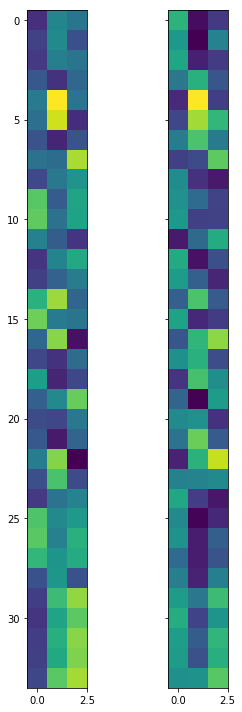

In [17]:
comp = pca3.components_
comp_abs = np.abs(comp)
fig, ax = plt.subplots(sharey=True, ncols=2, figsize=(5,10))
ax[0].imshow(comp.T)
ax[1].imshow(comp_abs.T)

# ax[0].set(yticks=np.arange(len(questions)), 
#          yticklabels=questions)
plt.tight_layout()
# plt.savefig('{}/comp.png'.format(ana_name))
plt.show()

In [176]:
np.savetxt('{}/X.csv'.format(dir_ana_plot), X, delimiter=',')
np.savetxt('{}/Xis.csv'.format(dir_ana_plot), Xis, delimiter=',')
np.savetxt('{}/pca3.csv'.format(dir_ana_plot), Xis_pca3, delimiter=',')
np.savetxt('{}/comp.csv'.format(dir_ana_plot), comp, delimiter=',')
y.to_csv('{}/y.csv'.format(dir_ana_plot), index=False)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [ ]:
dat_q.iloc[[4, 5, 6, 14, 16, 17, 18, 20, 21, 22], 2]
dat_q.iloc[[16, 22], 2]

In [191]:
print(list(X.columns.values[[11, 10, 15, 17,18, 24]]))

print(list(X.columns.values[[11, 10, 27, 24]]))
print(list(X.columns.values[[20, 0, 26, 2, 3]]))

['FiscalDeficit', 'PrimaryBalance', 'Trade', 'FiscalStimulus', 'PublicEnterprise', 'DifferentSurname']
['FiscalDeficit', 'PrimaryBalance', 'RestrictionOnParty', 'DifferentSurname']
['AgriculturalCooperative', 'Abenomics', 'Redistricting', 'NourthernTerriories', 'SouthKorea']


In [25]:
n_comp = 4
pca4 = PCA(n_components=n_comp)

# Xs_pca4 = pca4.fit_transform(Xs)
Xis_pca4 = pca4.fit_transform(Xis)

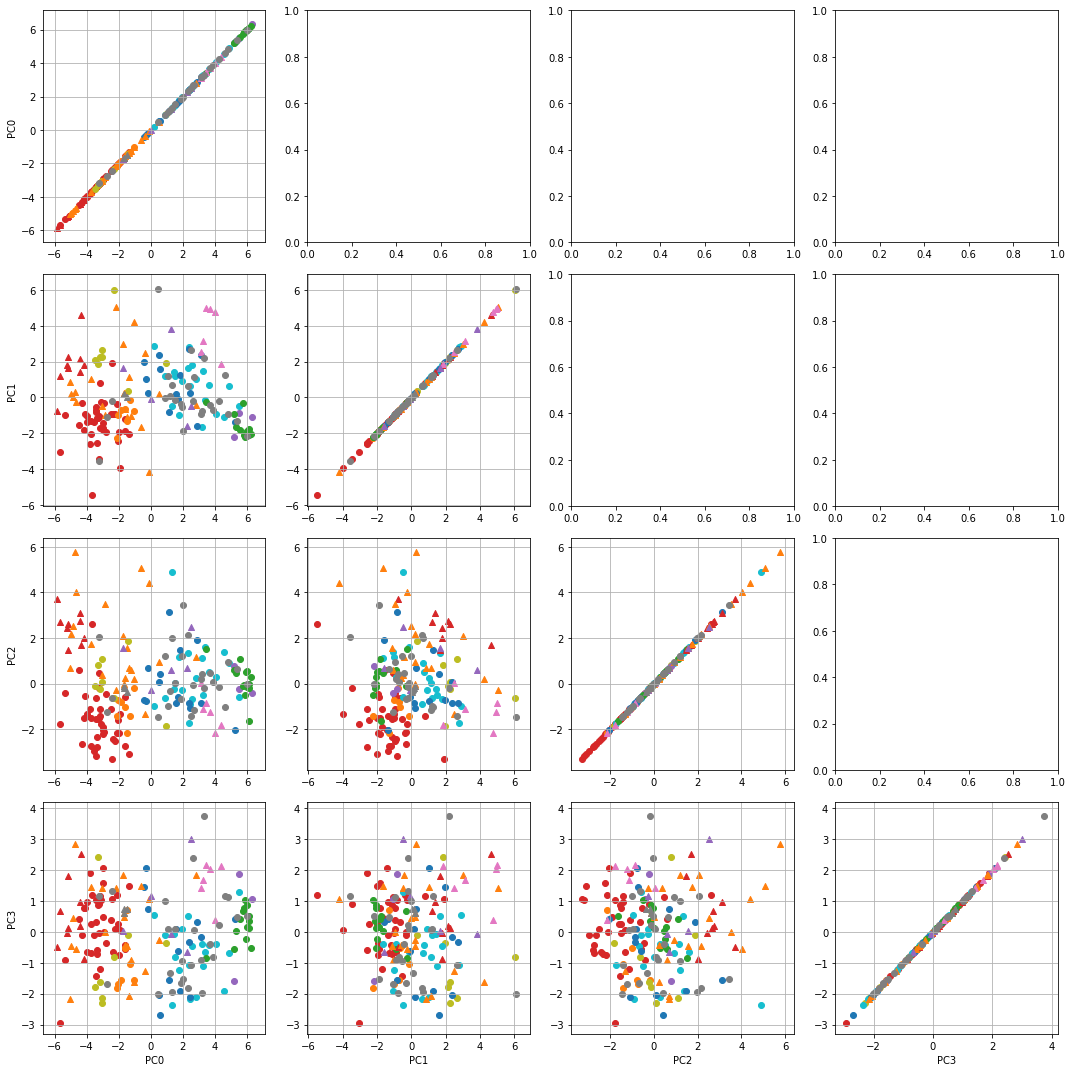

In [27]:
fig, ax = plt.subplots(ncols=n_comp, nrows=n_comp, figsize=(15,15))

for i in range(n_comp):
    ax[n_comp-1,i].set(xlabel=('PC%d' % i))
    ax[i,0].set(ylabel=('PC%d' % i))
    for j in range(n_comp):
        if j >= i:
            for party in parties:
#                 ax[j,i].scatter(Xs_pca4[y==party[0], [i]], 
#                                 Xs_pca4[y==party[0], [j]], 
#                                 label=party[1],
#                                 c=c[party[2]], 
#                                 marker=party[3])
                ax[j,i].scatter(Xis_pca4[y==party[0], [i]], 
                                Xis_pca4[y==party[0], [j]], 
                                label=party[1],
                                c=c[party[2]], 
                                marker=party[3])
            ax[j,i].grid(True)
            
# fig.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
# plt.savefig('PCA3.png')
plt.show()

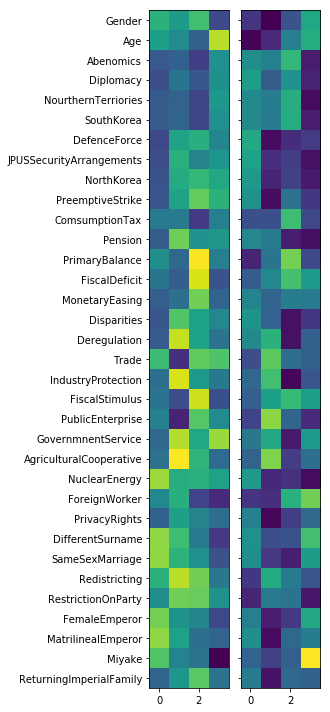

In [28]:
comp = pca4.components_
comp_abs = np.abs(comp)
fig, ax = plt.subplots(sharey=True, ncols=2, figsize=(5,10))

ax[0].imshow(comp.T)
ax[1].imshow(comp_abs.T)

ax[0].set(yticks=np.arange(len(questions)), 
       yticklabels=questions)
# ax[1].set(yticks=np.arange(len(questions)), 
#        yticklabels=questions)
plt.tight_layout()
# plt.savefig('PCA3_comp')
plt.show()

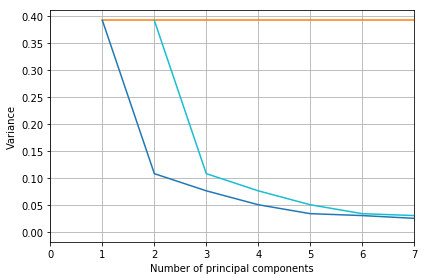

In [18]:
# model compare

vars_best = np.array([])
vars_worst2 = np.array([])
vars_worst = np.array([])

# for n in np.arange(len(Xs[0]), 0, -1):
for n in np.arange(len(Xis[0]), 0, -1):
    pca = PCA(n_components=n)

    # Xs_pca = pca.fit_transform(Xs)
    Xis_pca = pca.fit_transform(Xis)
    var_best = pca.explained_variance_ratio_[0]
    if n > 1:
        var_worst2 = pca.explained_variance_ratio_[-2]
        vars_worst2 = np.append(vars_worst2, np.array([var_worst2]))
    var_worst = pca.explained_variance_ratio_[-1]
    
    vars_best = np.append(vars_best, np.array([var_best]))
    vars_worst = np.append(vars_worst, np.array([var_worst]))

fig, ax = plt.subplots()
# ax.plot(np.arange(len(Xs[0]), 0, -1), vars_best, c=c['o'])
# ax.plot(np.arange(len(Xs[0]), 1, -1), vars_worst2, c=c['c'])
# ax.plot(np.arange(len(Xs[0]), 0, -1), vars_worst, c=c['b'])

ax.plot(np.arange(len(Xis[0]), 0, -1), vars_best, c=c['o'])
ax.plot(np.arange(len(Xis[0]), 1, -1), vars_worst2, c=c['c'])
ax.plot(np.arange(len(Xis[0]), 0, -1), vars_worst, c=c['b'])

ax.grid(True)
ax.set(xlabel='Number of principal components', 
       ylabel='Variance',
       xticks=np.arange(8),
       xlim=(0, 7)
      )
plt.tight_layout()
plt.show()

In [48]:
pca2.explained_variance_ratio_

array([0.39733277, 0.12853882])

In [99]:
import json

dat_json = {}
dat_json['pca2'] = []
dat_json['comp'] = []

for i in range(len(Xis_pca2)):
    dat_json['pca2'].append({
        'name': dat_.iloc[i, 0],
        'party': parties[dat_.iloc[i, 2]-1, 5],
        'PC0': Xis_pca2[i, 0],
        'PC1': Xis_pca2[i, 1]
    })
for i in range(len(comp.T)):
    dat_json['comp'].append({
        'PC0': comp[0, i],
        'PC1': comp[1, i]
    })

with open('{}/data.txt'.format(ana_name), 'w') as outfile:  
    json.dump(dat_json, outfile, ensure_ascii=False)

In [27]:
data_ver = '0716'
src_dat = 'https://raw.githubusercontent.com/shumez/election/master/councilor2019/data/data2019_{}.csv'.format(data_ver)
src_shitsumon = 'https://raw.githubusercontent.com/shumez/election/master/councilor2019/data/shitsumon.csv'
thresh = 15
imp_strategy = 'mean'
n_components = 3

process = {}
process['readdata'] = []
process['dropna'] = []
process['imputation'] = []
process['scaling'] = []
process['pca'] = []


def mkana():
    dt = datetime.datetime.now()
    ana_name = '{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
#     ana_name = '201907151748'
    dir_ana = 'analysis/{}'.format(ana_name)
    dir_ana_plot = '{}/plot'.format(dir_ana)
#     os.mkdir(dir_ana)
#     os.mkdir(dir_ana_plot)
    
    return ana_name, dir_ana, dir_ana_plot

parties = np.array([
    ['LDP', 'LDP', 'r', 'o', 1., '自民'],
    ['Koumei', 'Koumei', 'o', 'o', 2., '公明'],
    ['independent', 'Independent', 'br', 'o', 3., '無所属'],
    ['CDP', 'CDP', 'b', 'o', 4., '立憲'],
    ['DPFP', 'DPFP', 'c', 'o', 5., '国民'],
    ['JCP', 'JCP', 'g', 'o', 6., '共産'],
    ['Ishin', 'Ishin', 'y', 'o', 7., '維新'],
    ['Kibou', 'Kibou', 'gr', '^', 8., '希望'],
    ['SDP', 'SDP', 'v', 'o', 9., '社民'],
    ['Reiwa', 'Reiwa', 'p', 'o', 10., 'れいわ'],
    ['Koufuku', 'Koufuku', 'gr', '^', 11., '幸福'],
    ['Labour', 'Labour', 'gr', '^', 12., '労働'],
    ['NHK', 'NHK', 'gr', '^', 13., 'N国'],
    ['Shoha', 'Shoha', 'gr', '^', 14., '諸派'],
    ['Olive', 'Olive', 'gr', '^', 15., 'オリーブ'],
    ['Anrakushi', 'Anrakushi', 'gr', '^', 16., '安楽死']
#     ['Nihonmutouhatou', 'Nihonmutouhatou', 'br', '^'], 
])

# read data
dat = pd.read_csv(src_dat)
dat_shitsumon = pd.read_csv(src_shitsumon)

process['readdata'].append({'dat': src_dat, 'dat_shitsumon': src_shitsumon})

# preprocessing
dat['Block'] = dat['Block'].replace(66, 48)

dat_5scale = dat.iloc[:, 7:32]
dat_5scale = dat_5scale.replace(0, np.nan)
dat_5scale = dat_5scale.replace(99, np.nan)
dat_5scale1 = dat.iloc[:, 48:]
dat_5scale1 = dat_5scale1.replace(0, np.nan)
dat_5scale1 = dat_5scale1.replace(99, np.nan)
dat_2scale = dat.iloc[:, 32:48]
dat_2scale = dat_2scale.replace(66, np.nan)
dat_2scale = dat_2scale.replace(99, np.nan)

dat_ = pd.concat([dat.iloc[:, 1:4], dat_5scale, dat_5scale1], axis=1)

# drop NaN
dat_ = dat_.dropna(thresh=thresh)
process['dropna'].append({'thresh': thresh})

# X, y
# X = pd.concat([dat_.iloc[:, 1], dat_.iloc[:, 3:]], axis=1)
X = dat_.iloc[:, 3:]
y = dat_.iloc[:, 2]

# imputation
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy=imp_strategy, axis=0)
imr = imr.fit(X.values)
Xi = imr.transform(X.values)

process['imputation'].append({'strategy': imp_strategy})

# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xis = sc.fit_transform(Xi)

process['scaling'].append({'scaler': 'StandardScaler'})

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
Xis_pca = pca.fit_transform(Xis)
comp = pca.components_
comp_abs = np.abs(comp)

process['pca'].append({'n_components': n_components})

ana_name, dir_ana, dir_ana_plot = mkana()

# save data
# np.savetxt('{}/parties.csv'.format(dir_ana), parties, delimiter=',')

# np.savetxt('{}/X.csv'.format(dir_ana), X, delimiter=',')
# y.to_csv('{}/y.csv'.format(dir_ana), index=False, header=False)
# dat_.to_csv('{}/dat_.csv'.format(dir_ana), index=False)
# np.savetxt('{}/Xis.csv'.format(dir_ana), Xis, delimiter=',')
# np.savetxt('{}/Xis_pca.csv'.format(dir_ana), Xis_pca, delimiter=',')
# np.savetxt('{}/comp.csv'.format(dir_ana), comp, delimiter=',')


# with open('{}/process.txt'.format(dir_ana), 'w') as outfile:  
#     json.dump(process, outfile, ensure_ascii=False)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [68]:
ana_name = '201907172020'

dat_ = pd.read_csv('https://raw.githubusercontent.com/shumez/election/master/councilor2019/analysis/{}/dat_.csv'.format(ana_name))
print('{}'.format(len(dat_)))

Xis_pca = pd.read_csv('https://raw.githubusercontent.com/shumez/election/master/councilor2019/analysis/{}/Xis_pca.csv'.format(ana_name), header=None)
print('{}'.format(len(Xis_pca)))
Xis_pca = Xis_pca.values

comp = pd.read_csv('https://raw.githubusercontent.com/shumez/election/master/councilor2019/analysis/{}/comp.csv'.format(ana_name), header=None)
print('{}'.format(len(comp)))
comp = comp.values

y = pd.read_csv('https://raw.githubusercontent.com/shumez/election/master/councilor2019/analysis/{}/y.csv'.format(ana_name), header=None)
y = y.iloc[:, 0]
print('{}'.format(len(y)))
# y = y.values

344
344
3
344


In [67]:
year = '2021'

import plotly.graph_objs as go

import plotly.express as px

data = []

for p in range(len(parties)):
    trace0 = go.Scatter3d(
        x = Xis_pca3[y_party==p+1, 0],
        y = Xis_pca3[y_party==p+1, 1],
        z = Xis_pca3[y_party==p+1, 2],
        name = parties[p, 1],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = y[y_party==p+1].iloc[:, 1]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Repentative Election in {}'.format(year),
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
    
#     showlegend = True
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca3_3d_{}'.format(year))

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

In [29]:
year = '2019'

import plotly.graph_objs as go

data = []

for p in range(len(parties)):
    trace0 = go.Scatter3d(
        x = Xis_pca[y==p+1, 0],
        y = Xis_pca[y==p+1, 1],
        z = Xis_pca[y==p+1, 2],
        name = parties[p, 1],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Councillors Election in {}'.format(year),
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
    
#     showlegend = True
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca3_3d_{}'.format(year))

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

In [14]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
Xis_kpca = kpca.fit_transform(Xis)


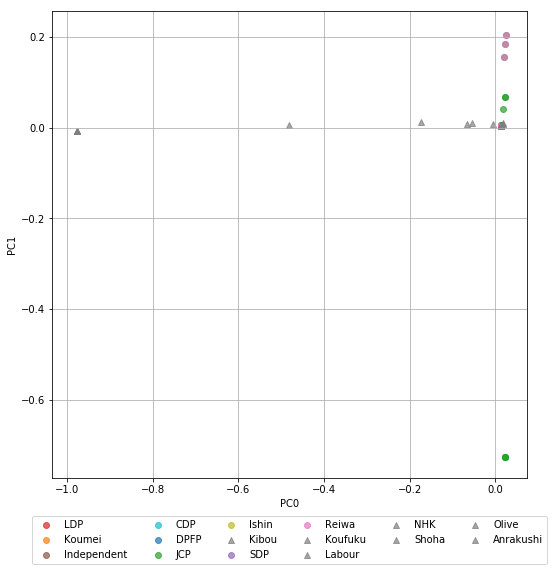

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

# for party in parties:
for party, p in zip(parties, range(16)):
    
    ax.scatter(Xis_kpca[y==p+1, 0], Xis_kpca[y==p+1, 1], label=party[1], c=c[party[2]], marker=party[3], alpha=.7)

ax.legend(loc='upper center', ncol=6, bbox_to_anchor=(0.5, -0.07))
ax.set(xlabel='PC0', ylabel='PC1')
# ax.set(xlim=(-10, 10), ylim=(-10,10))
ax.grid(True)
plt.tight_layout()
# plt.savefig('{}/PCA2.png'.format(dir_ana_plot))
plt.show()

In [28]:
year = '2017'
# data_ver = '0716'
# src_dat = 'https://raw.githubusercontent.com/shumez/election/master/councilor2019/data/data2019_{}.csv'.format(data_ver)
src_dat = 'data/data{}.csv'.format(year)
src_shitsumon = 'https://raw.githubusercontent.com/shumez/election/master/councilor2019/data/shitsumon.csv'
thresh = 15
imp_strategy = 'mean'
n_components = 3

process = {}
process['readdata'] = []
process['dropna'] = []
process['imputation'] = []
process['scaling'] = []
process['pca'] = []


def mkana():
    dt = datetime.datetime.now()
    ana_name = '{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
#     ana_name = '201907151748'
    dir_ana = 'analysis/{}'.format(ana_name)
    dir_ana_plot = '{}/plot'.format(dir_ana)
#     os.mkdir(dir_ana)
#     os.mkdir(dir_ana_plot)
    
    return ana_name, dir_ana, dir_ana_plot

parties = np.array([
    ['LDP', 'LDP', 'r', 'o', 1., '自民'],
    ['', '', 'gr', 'o', 2., ''],
    ['Koumei', 'Koumei', 'o', 'o', 3., '公明'],
    ['JCP', 'JCP', 'g', 'o', 4., '共産'],
    ['Ishin', 'Ishin', 'y', 'o', 5., '維新'],
    ['', '', 'gr', 'o', 6., ''],
    ['SDP', 'SDP', 'v', 'o', 7., '社民'],
    ['Kokoro', 'Kokoro', 'gr', '^', 8., 'こころ'],
    ['Kibou', 'Kibou', 'c', '^', 9., '希望'],
    ['Koufuku', 'Koufuku', 'gr', '^', 10., '幸福'],
    ['Shoha', 'Shoha', 'gr', '^', 11., '諸派'],
    ['independent', 'Independent', 'br', 'o', 12., '無所属'],
    ['CDP', 'CDP', 'b', 'o', 13., '立憲'],
    ['', '', 'gr', 'o', 14., ''],
    ['', '', 'gr', 'o', 15., ''],
    ['', '', 'gr', 'o', 16., ''],
    ['', '', 'gr', 'o', 17., ''],
    ['No party', 'No party', 'gr', '^', 18., '支持政党なし'],
    ['Daichi', 'Daichi', 'gr', '^', 19., '新党大地']
#     ['DPFP', 'DPFP', 'b', 'o', 5., '国民'],
#     ['Reiwa', 'Reiwa', 'p', 'o', 10., 'れいわ'],
#     ['Labour', 'Labour', 'gr', '^', 12., '労働'],
#     ['NHK', 'NHK', 'gr', '^', 13., 'N国'],
#     ['Olive', 'Olive', 'gr', '^', 15., 'オリーブ'],
#     ['Anrakushi', 'Anrakushi', 'gr', '^', 16., '安楽死']
#     ['Nihonmutouhatou', 'Nihonmutouhatou', 'br', '^'], 
])

# read data
dat = pd.read_csv(src_dat)
dat_shitsumon = pd.read_csv(src_shitsumon)

process['readdata'].append({'dat': src_dat, 'dat_shitsumon': src_shitsumon})

# preprocessing
dat['Block'] = dat['Block'].replace(66, 48)

dat_5scale = dat.iloc[:, 8:9]
dat_5scale = dat_5scale.replace(0, np.nan)
dat_5scale = dat_5scale.replace(99, np.nan)
dat_5scale1 = dat.iloc[:, 10:30]
dat_5scale1 = dat_5scale1.replace(0, np.nan)
dat_5scale1 = dat_5scale1.replace(99, np.nan)
dat_5scale2 = dat.iloc[:, 33:]
dat_5scale2 = dat_5scale2.replace(0, np.nan)
dat_5scale2 = dat_5scale2.replace(99, np.nan)

# dat_2scale = dat.iloc[:, 32:48]
# dat_2scale = dat_2scale.replace(66, np.nan)
# dat_2scale = dat_2scale.replace(99, np.nan)



dat_ = pd.concat([dat.iloc[:, 1:2], dat.iloc[:, 3:5], dat_5scale, dat_5scale1, dat_5scale2], axis=1)

# drop NaN
dat_ = dat_.dropna(thresh=thresh)
process['dropna'].append({'thresh': thresh})

# X, y
# X = pd.concat([dat_.iloc[:, 1], dat_.iloc[:, 3:]], axis=1)
X = dat_.iloc[:, 3:]
y = dat_.iloc[:, 2]

# imputation
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy=imp_strategy, axis=0)
imr = imr.fit(X.values)
Xi = imr.transform(X.values)

process['imputation'].append({'strategy': imp_strategy})

# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xis = sc.fit_transform(Xi)

process['scaling'].append({'scaler': 'StandardScaler'})

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
Xis_pca = pca.fit_transform(Xis)
comp = pca.components_
comp_abs = np.abs(comp)

process['pca'].append({'n_components': n_components})

ana_name, dir_ana, dir_ana_plot = mkana()

# save data
# np.savetxt('{}/parties.csv'.format(dir_ana), parties, delimiter=',')
# np.savetxt('{}/X.csv'.format(dir_ana), X, delimiter=',')
# y.to_csv('{}/y.csv'.format(dir_ana), index=False, header=False)
# dat_.to_csv('{}/dat_.csv'.format(dir_ana), index=False)
# np.savetxt('{}/Xis.csv'.format(dir_ana), Xis, delimiter=',')
# np.savetxt('{}/Xis_pca.csv'.format(dir_ana), Xis_pca, delimiter=',')
# np.savetxt('{}/comp.csv'.format(dir_ana), comp, delimiter=',')


# with open('{}/process.txt'.format(dir_ana), 'w') as outfile:  
#     json.dump(process, outfile, ensure_ascii=False)




import plotly.graph_objs as go

data = []

for p in range(len(parties)):
    trace0 = go.Scatter3d(
        x = Xis_pca[y==p+1, 0],
        y = Xis_pca[y==p+1, 1],
        z = Xis_pca[y==p+1, 2],
        name = parties[p, 1],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Representatives Election in {}'.format(year),
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca3_3d_2017')

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [29]:
n_components = 2
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
Xis_pca = pca.fit_transform(Xis)
comp = pca.components_
comp_abs = np.abs(comp)

import plotly.graph_objs as go

data = []

for p in range(len(parties)):
    trace0 = go.Scatter(
        x = Xis_pca[y==p+1, 0],
        y = Xis_pca[y==p+1, 1],
        name = parties[p, 1],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Representatives Election in {}'.format(year),
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        )
    )
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca2_2017')

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



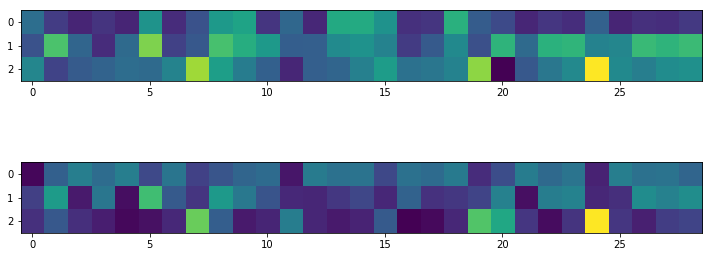

In [7]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 5))
ax[0].imshow(comp)
ax[1].imshow(comp_abs)
plt.tight_layout()
plt.show()

In [17]:
year = '2014'
src_dat = 'data/data{}.csv'.format(year)
src_shitsumon = 'https://raw.githubusercontent.com/shumez/election/master/councilor2019/data/shitsumon.csv'
thresh = 15
imp_strategy = 'mean'
n_components = 3

process = {}
process['readdata'] = []
process['dropna'] = []
process['imputation'] = []
process['scaling'] = []
process['pca'] = []


def mkana():
    dt = datetime.datetime.now()
    ana_name = '{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
#     ana_name = '201907151748'
    dir_ana = 'analysis/{}'.format(ana_name)
    dir_ana_plot = '{}/plot'.format(dir_ana)
#     os.mkdir(dir_ana)
#     os.mkdir(dir_ana_plot)
    
    return ana_name, dir_ana, dir_ana_plot

parties = np.array([
    ['自民', 'LDP', 'r', 'o', 1., '自民'],
    ['公明', 'Koumei', 'o', 'o', 2., '公明'],
    ['維新', 'Ishin', 'y', 'o', 3., '維新'],
    
    ['民主', 'Dem', 'b', 'o', 4., '民主'],
    ['社民', 'SDP', 'v', 'o', 5., '社民'],
    ['共産', 'JCP', 'g', 'o', 6., '共産'],
    ['生活', 'Seikatsu', 'gr', 'o', 7., '生活'],
    
    ['無所', 'Independent', 'br', 'o', 8., '無所属'],
    ['諸派', 'Shoha', 'gr', '^', 9., '諸派'],
    ['幸福', 'Koufuku', 'gr', '^', 10., '幸福'],
    ['次世', 'Jisedai', 'gr', '^', 11., '次世代'],
    ['改革', 'Kaikaku', 'gr', '^', 12., '改革']
    
#     ['みど', 'Midori', 'gr', '^', 11., 'みどり'],
#     ['みん', 'Minna', 'gr', '^', 12., 'みんな'], 
#     ['大地', 'Daichi', 'gr', '^', 13., '新党大地'], 
#     ['新風', 'Shinpu', 'gr', '^', 14., '新風'], 
#     ['減税', 'Genzei', 'gr', '^', 15., '減税'], 
#     ['緑党', 'Midori', 'gr', '^', 16., '緑党']
    
#     ['', '', 'gr', 'o', 6., ''],
#     ['Kokoro', 'Kokoro', 'gr', '^', 8., 'こころ'],
#     ['No party', 'No party', 'gr', '^', 18., '支持政党なし'],
#     ['DPFP', 'DPFP', 'b', 'o', 5., '国民'],
#     ['Reiwa', 'Reiwa', 'p', 'o', 10., 'れいわ'],
#     ['Labour', 'Labour', 'gr', '^', 12., '労働'],
#     ['NHK', 'NHK', 'gr', '^', 13., 'N国'],
#     ['Olive', 'Olive', 'gr', '^', 15., 'オリーブ'],
#     ['Anrakushi', 'Anrakushi', 'gr', '^', 16., '安楽死']
#     ['Nihonmutouhatou', 'Nihonmutouhatou', 'br', '^'], 
])

# read data
dat = pd.read_csv(src_dat)
# dat_shitsumon = pd.read_csv(src_shitsumon)

process['readdata'].append({'dat': src_dat, 'dat_shitsumon': src_shitsumon})

# preprocessing
# dat['Block'] = dat['Block'].replace(66, 48)

dat_5scale = dat.iloc[:, 7:34]
dat_5scale = dat_5scale.replace(0, np.nan)
dat_5scale = dat_5scale.replace(66, np.nan)
dat_5scale = dat_5scale.replace(99, np.nan)

dat_5scale2 = dat.iloc[:, 38:]
dat_5scale2 = dat_5scale2.replace(0, np.nan)
dat_5scale2 = dat_5scale2.replace(66, np.nan)
dat_5scale2 = dat_5scale2.replace(99, np.nan)

dat_ = pd.concat([dat.iloc[:, 0:1], dat.iloc[:, 2:3], dat_5scale, dat_5scale2], axis=1)

# drop NaN
dat_ = dat_.dropna(thresh=thresh)
process['dropna'].append({'thresh': thresh})

# X, y
# X = pd.concat([dat_.iloc[:, 1], dat_.iloc[:, 3:]], axis=1)
X = dat_.iloc[:, 2:]
y = dat_.iloc[:, 1]

# imputation
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy=imp_strategy, axis=0)
imr = imr.fit(X.values)
Xi = imr.transform(X.values)

process['imputation'].append({'strategy': imp_strategy})

# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xis = sc.fit_transform(Xi)

process['scaling'].append({'scaler': 'StandardScaler'})

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
Xis_pca = pca.fit_transform(Xis)
comp = pca.components_
comp_abs = np.abs(comp)

process['pca'].append({'n_components': n_components})

ana_name, dir_ana, dir_ana_plot = mkana()

# save data
# np.savetxt('{}/parties.csv'.format(dir_ana), parties, delimiter=',')
# np.savetxt('{}/X.csv'.format(dir_ana), X, delimiter=',')
# y.to_csv('{}/y.csv'.format(dir_ana), index=False, header=False)
# dat_.to_csv('{}/dat_.csv'.format(dir_ana), index=False)
# np.savetxt('{}/Xis.csv'.format(dir_ana), Xis, delimiter=',')
# np.savetxt('{}/Xis_pca.csv'.format(dir_ana), Xis_pca, delimiter=',')
# np.savetxt('{}/comp.csv'.format(dir_ana), comp, delimiter=',')


# with open('{}/process.txt'.format(dir_ana), 'w') as outfile:  
#     json.dump(process, outfile, ensure_ascii=False)




import plotly.graph_objs as go

data = []

for p in range(len(parties)):
    trace0 = go.Scatter3d(
        x = Xis_pca[y==parties[p, 0], 0],
        y = Xis_pca[y==parties[p, 0], 1],
        z = Xis_pca[y==parties[p, 0], 2],
        name = parties[p, 1],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 1]==parties[p, 0]].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Representatives Election in {}'.format(year),
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca3_3d_{}'.format(year))

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [5]:
year = '2013'
src_dat = 'data/data{}.csv'.format(year)
src_shitsumon = 'https://raw.githubusercontent.com/shumez/election/master/councilor2019/data/shitsumon.csv'
thresh = 15
imp_strategy = 'mean'
n_components = 3

process = {}
process['readdata'] = []
process['dropna'] = []
process['imputation'] = []
process['scaling'] = []
process['pca'] = []


def mkana():
    dt = datetime.datetime.now()
    ana_name = '{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
#     ana_name = '201907151748'
    dir_ana = 'analysis/{}'.format(ana_name)
    dir_ana_plot = '{}/plot'.format(dir_ana)
#     os.mkdir(dir_ana)
#     os.mkdir(dir_ana_plot)
    
    return ana_name, dir_ana, dir_ana_plot

parties = np.array([
    ['自民', 'LDP', 'r', 'o', 1., '自民'],
    ['公明', 'Koumei', 'o', 'o', 2., '公明'],
    ['維新', 'Ishin', 'y', 'o', 3., '維新'],
    
    ['民主', 'Dem', 'b', 'o', 4., '民主'],
    ['社民', 'SDP', 'v', 'o', 5., '社民'],
    ['共産', 'JCP', 'g', 'o', 6., '共産'],
    ['生活', 'Seikatsu', 'gr', 'o', 7., '生活'],
    
    ['無所', 'Independent', 'br', 'o', 8., '無所属'],
    ['諸派', 'Shoha', 'gr', '^', 9., '諸派'],
    ['幸福', 'Koufuku', 'gr', '^', 10., '幸福'],
    ['みど', 'Midori', 'gr', '^', 11., 'みどり'],
    ['みん', 'Minna', 'gr', '^', 12., 'みんな'], 
    ['大地', 'Daichi', 'gr', '^', 13., '新党大地'], 
    ['新風', 'Shinpu', 'gr', '^', 14., '新風'], 
    ['減税', 'Genzei', 'gr', '^', 15., '減税'], 
    ['緑党', 'Midori', 'gr', '^', 16., '緑党']
    
#     ['', '', 'gr', 'o', 6., ''],
#     ['Kokoro', 'Kokoro', 'gr', '^', 8., 'こころ'],
#     ['No party', 'No party', 'gr', '^', 18., '支持政党なし'],
#     ['DPFP', 'DPFP', 'b', 'o', 5., '国民'],
#     ['Reiwa', 'Reiwa', 'p', 'o', 10., 'れいわ'],
#     ['Labour', 'Labour', 'gr', '^', 12., '労働'],
#     ['NHK', 'NHK', 'gr', '^', 13., 'N国'],
#     ['Olive', 'Olive', 'gr', '^', 15., 'オリーブ'],
#     ['Anrakushi', 'Anrakushi', 'gr', '^', 16., '安楽死']
#     ['Nihonmutouhatou', 'Nihonmutouhatou', 'br', '^'], 
])

# read data
dat = pd.read_csv(src_dat)
# dat_shitsumon = pd.read_csv(src_shitsumon)

process['readdata'].append({'dat': src_dat, 'dat_shitsumon': src_shitsumon})

# preprocessing
# dat['Block'] = dat['Block'].replace(66, 48)

dat_5scale = dat.iloc[:, 14:]
dat_5scale = dat_5scale.replace(0, np.nan)
dat_5scale = dat_5scale.replace(99, np.nan)


dat_ = pd.concat([dat.iloc[:, 0:1], dat.iloc[:, 4:5], dat.iloc[:, 7:8], dat_5scale], axis=1)

# drop NaN
dat_ = dat_.dropna(thresh=thresh)
process['dropna'].append({'thresh': thresh})

# X, y
# X = pd.concat([dat_.iloc[:, 1], dat_.iloc[:, 3:]], axis=1)
X = dat_.iloc[:, 3:]
y = dat_.iloc[:, 2]

# imputation
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy=imp_strategy, axis=0)
imr = imr.fit(X.values)
Xi = imr.transform(X.values)

process['imputation'].append({'strategy': imp_strategy})

# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xis = sc.fit_transform(Xi)

process['scaling'].append({'scaler': 'StandardScaler'})

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
Xis_pca = pca.fit_transform(Xis)
comp = pca.components_
comp_abs = np.abs(comp)

process['pca'].append({'n_components': n_components})

ana_name, dir_ana, dir_ana_plot = mkana()

# save data
# np.savetxt('{}/parties.csv'.format(dir_ana), parties, delimiter=',')
# np.savetxt('{}/X.csv'.format(dir_ana), X, delimiter=',')
# y.to_csv('{}/y.csv'.format(dir_ana), index=False, header=False)
# dat_.to_csv('{}/dat_.csv'.format(dir_ana), index=False)
# np.savetxt('{}/Xis.csv'.format(dir_ana), Xis, delimiter=',')
# np.savetxt('{}/Xis_pca.csv'.format(dir_ana), Xis_pca, delimiter=',')
# np.savetxt('{}/comp.csv'.format(dir_ana), comp, delimiter=',')


# with open('{}/process.txt'.format(dir_ana), 'w') as outfile:  
#     json.dump(process, outfile, ensure_ascii=False)




import plotly.graph_objs as go

data = []

for p in range(len(parties)):
    trace0 = go.Scatter3d(
        x = - Xis_pca[y==parties[p, 0], 0],
        y = Xis_pca[y==parties[p, 0], 1],
        z = Xis_pca[y==parties[p, 0], 2],
        name = parties[p, 1],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==parties[p, 0]].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Councillors Election in {}'.format(year),
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca3_3d_2013')

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [18]:
year = '2013'
src_dat = 'data/data{}.csv'.format(year)
src_shitsumon = 'https://raw.githubusercontent.com/shumez/election/master/councilor2019/data/shitsumon.csv'
thresh = 15
imp_strategy = 'mean'
n_components = 2

process = {}
process['readdata'] = []
process['dropna'] = []
process['imputation'] = []
process['scaling'] = []
process['pca'] = []


def mkana():
    dt = datetime.datetime.now()
    ana_name = '{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
#     ana_name = '201907151748'
    dir_ana = 'analysis/{}'.format(ana_name)
    dir_ana_plot = '{}/plot'.format(dir_ana)
#     os.mkdir(dir_ana)
#     os.mkdir(dir_ana_plot)
    
    return ana_name, dir_ana, dir_ana_plot

parties = np.array([
    ['自民', 'LDP', 'r', 'o', 1., '自民'],
    ['公明', 'Koumei', 'o', 'o', 2., '公明'],
    ['維新', 'Ishin', 'y', 'o', 3., '維新'],
    
    ['民主', 'Dem', 'b', 'o', 4., '民主'],
    ['社民', 'SDP', 'v', 'o', 5., '社民'],
    ['共産', 'JCP', 'g', 'o', 6., '共産'],
    ['生活', 'Seikatsu', 'gr', 'o', 7., '生活'],
    
    ['無所', 'Independent', 'br', 'o', 8., '無所属'],
    ['諸派', 'Shoha', 'gr', '^', 9., '諸派'],
    ['幸福', 'Koufuku', 'gr', '^', 10., '幸福'],
    ['みど', 'Midori', 'gr', '^', 11., 'みどり'],
    ['みん', 'Minna', 'gr', '^', 12., 'みんな'], 
    ['大地', 'Daichi', 'gr', '^', 13., '新党大地'], 
    ['新風', 'Shinpu', 'gr', '^', 14., '新風'], 
    ['減税', 'Genzei', 'gr', '^', 15., '減税'], 
    ['緑党', 'Midori', 'gr', '^', 16., '緑党']
    
#     ['', '', 'gr', 'o', 6., ''],
#     ['Kokoro', 'Kokoro', 'gr', '^', 8., 'こころ'],
#     ['No party', 'No party', 'gr', '^', 18., '支持政党なし'],
#     ['DPFP', 'DPFP', 'b', 'o', 5., '国民'],
#     ['Reiwa', 'Reiwa', 'p', 'o', 10., 'れいわ'],
#     ['Labour', 'Labour', 'gr', '^', 12., '労働'],
#     ['NHK', 'NHK', 'gr', '^', 13., 'N国'],
#     ['Olive', 'Olive', 'gr', '^', 15., 'オリーブ'],
#     ['Anrakushi', 'Anrakushi', 'gr', '^', 16., '安楽死']
#     ['Nihonmutouhatou', 'Nihonmutouhatou', 'br', '^'], 
])

# read data
dat = pd.read_csv(src_dat)
# dat_shitsumon = pd.read_csv(src_shitsumon)

process['readdata'].append({'dat': src_dat, 'dat_shitsumon': src_shitsumon})

# preprocessing
# dat['Block'] = dat['Block'].replace(66, 48)

dat_5scale = dat.iloc[:, 14:]
dat_5scale = dat_5scale.replace(0, np.nan)
dat_5scale = dat_5scale.replace(99, np.nan)


dat_ = pd.concat([dat.iloc[:, 0:1], dat.iloc[:, 4:5], dat.iloc[:, 7:8], dat_5scale], axis=1)

# drop NaN
dat_ = dat_.dropna(thresh=thresh)
process['dropna'].append({'thresh': thresh})

# X, y
# X = pd.concat([dat_.iloc[:, 1], dat_.iloc[:, 3:]], axis=1)
X = dat_.iloc[:, 3:]
y = dat_.iloc[:, 2]

# imputation
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy=imp_strategy, axis=0)
imr = imr.fit(X.values)
Xi = imr.transform(X.values)

process['imputation'].append({'strategy': imp_strategy})

# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xis = sc.fit_transform(Xi)

process['scaling'].append({'scaler': 'StandardScaler'})

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
Xis_pca = pca.fit_transform(Xis)
comp = pca.components_
comp_abs = np.abs(comp)

process['pca'].append({'n_components': n_components})

ana_name, dir_ana, dir_ana_plot = mkana()

# save data
# np.savetxt('{}/parties.csv'.format(dir_ana), parties, delimiter=',')
# np.savetxt('{}/X.csv'.format(dir_ana), X, delimiter=',')
# y.to_csv('{}/y.csv'.format(dir_ana), index=False, header=False)
# dat_.to_csv('{}/dat_.csv'.format(dir_ana), index=False)
# np.savetxt('{}/Xis.csv'.format(dir_ana), Xis, delimiter=',')
# np.savetxt('{}/Xis_pca.csv'.format(dir_ana), Xis_pca, delimiter=',')
# np.savetxt('{}/comp.csv'.format(dir_ana), comp, delimiter=',')


# with open('{}/process.txt'.format(dir_ana), 'w') as outfile:  
#     json.dump(process, outfile, ensure_ascii=False)




import plotly.graph_objs as go

data = []

for p in range(len(parties)):
    trace0 = go.Scatter(
        x = - Xis_pca[y==parties[p, 0], 0],
        y = Xis_pca[y==parties[p, 0], 1],
        name = parties[p, 1],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==parties[p, 0]].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Councillors Election in {}'.format(year),
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        )
    )
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca2_2013')

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [3]:
year = '2013'
src_dat = 'data/data{}.csv'.format(year)
# src_shitsumon = 'https://raw.githubusercontent.com/shumez/election/master/councilor2019/data/shitsumon.csv'
thresh = 15
imp_strategy = 'mean'
n_components = 2

process = {}
process['readdata'] = []
process['dropna'] = []
process['imputation'] = []
process['scaling'] = []
process['pca'] = []


def mkana():
    dt = datetime.datetime.now()
    ana_name = '{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
#     ana_name = '201907151748'
    dir_ana = 'analysis/{}'.format(ana_name)
    dir_ana_plot = '{}/plot'.format(dir_ana)
#     os.mkdir(dir_ana)
#     os.mkdir(dir_ana_plot)
    
    return ana_name, dir_ana, dir_ana_plot

parties = np.array([
    ['自民', 'LDP', 'r', 'o', 1., '自民'],
    ['公明', 'Koumei', 'o', 'o', 2., '公明'],
    ['維新', 'Ishin', 'y', 'o', 3., '維新'],
    
    ['民主', 'Dem', 'b', 'o', 4., '民主'],
    ['社民', 'SDP', 'v', 'o', 5., '社民'],
    ['共産', 'JCP', 'g', 'o', 6., '共産'],
    ['生活', 'Seikatsu', 'gr', 'o', 7., '生活'],
    
    ['無所', 'Independent', 'br', 'o', 8., '無所属'],
    ['諸派', 'Shoha', 'gr', '^', 9., '諸派'],
    ['幸福', 'Koufuku', 'gr', '^', 10., '幸福'],
    ['みど', 'Midori', 'gr', '^', 11., 'みどり'],
    ['みん', 'Minna', 'gr', '^', 12., 'みんな'], 
    ['大地', 'Daichi', 'gr', '^', 13., '新党大地'], 
    ['新風', 'Shinpu', 'gr', '^', 14., '新風'], 
    ['減税', 'Genzei', 'gr', '^', 15., '減税'], 
    ['緑党', 'Midori', 'gr', '^', 16., '緑党']
    
#     ['', '', 'gr', 'o', 6., ''],
#     ['Kokoro', 'Kokoro', 'gr', '^', 8., 'こころ'],
#     ['No party', 'No party', 'gr', '^', 18., '支持政党なし'],
#     ['DPFP', 'DPFP', 'b', 'o', 5., '国民'],
#     ['Reiwa', 'Reiwa', 'p', 'o', 10., 'れいわ'],
#     ['Labour', 'Labour', 'gr', '^', 12., '労働'],
#     ['NHK', 'NHK', 'gr', '^', 13., 'N国'],
#     ['Olive', 'Olive', 'gr', '^', 15., 'オリーブ'],
#     ['Anrakushi', 'Anrakushi', 'gr', '^', 16., '安楽死']
#     ['Nihonmutouhatou', 'Nihonmutouhatou', 'br', '^'], 
])

# read data
dat = pd.read_csv(src_dat)
# dat_shitsumon = pd.read_csv(src_shitsumon)

# process['readdata'].append({'dat': src_dat, 'dat_shitsumon': src_shitsumon})

# preprocessing
# dat['Block'] = dat['Block'].replace(66, 48)

dat_5scale = dat.iloc[:, 14:]
dat_5scale = dat_5scale.replace(0, np.nan)
dat_5scale = dat_5scale.replace(99, np.nan)


dat_ = pd.concat([dat.iloc[:, 0:1], dat.iloc[:, 4:5], dat.iloc[:, 7:8], dat_5scale], axis=1)

# drop NaN
dat_ = dat_.dropna(thresh=thresh)
process['dropna'].append({'thresh': thresh})

# X, y
# X = pd.concat([dat_.iloc[:, 1], dat_.iloc[:, 3:]], axis=1)
X = dat_.iloc[:, 3:]
y = dat_.iloc[:, 2]

# imputation
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy=imp_strategy, axis=0)
imr = imr.fit(X.values)
Xi = imr.transform(X.values)

process['imputation'].append({'strategy': imp_strategy})

# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xis = sc.fit_transform(Xi)

process['scaling'].append({'scaler': 'StandardScaler'})

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
Xis_pca = pca.fit_transform(Xis)
comp = pca.components_
comp_abs = np.abs(comp)

process['pca'].append({'n_components': n_components})

ana_name, dir_ana, dir_ana_plot = mkana()

# save data
# np.savetxt('{}/parties.csv'.format(dir_ana), parties, delimiter=',')
# np.savetxt('{}/X.csv'.format(dir_ana), X, delimiter=',')
# y.to_csv('{}/y.csv'.format(dir_ana), index=False, header=False)
# dat_.to_csv('{}/dat_.csv'.format(dir_ana), index=False)
# np.savetxt('{}/Xis.csv'.format(dir_ana), Xis, delimiter=',')
# np.savetxt('{}/Xis_pca.csv'.format(dir_ana), Xis_pca, delimiter=',')
# np.savetxt('{}/comp.csv'.format(dir_ana), comp, delimiter=',')


# with open('{}/process.txt'.format(dir_ana), 'w') as outfile:  
#     json.dump(process, outfile, ensure_ascii=False)




import plotly.graph_objs as go

data = []

for p in range(len(parties)):
    trace0 = go.Scatter(
        x = - Xis_pca[y==parties[p, 0], 0],
        y = Xis_pca[y==parties[p, 0], 1],
        name = parties[p, 1],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==parties[p, 0]].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Councillors Election in {}'.format(year),
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        )
    )
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca2_2013')

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



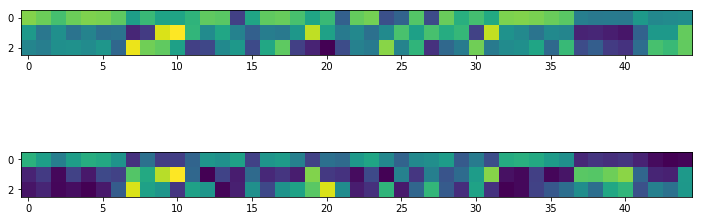

In [26]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 5))

ax[0].imshow(comp)
ax[1].imshow(comp_abs)

plt.tight_layout()
plt.show()

In [3]:
dat_res = pd.read_csv('data/results_miyagi.csv')
dat_res = dat_res.iloc[:, 0:-1]
dat_res = dat_res.T

In [4]:
dat_res.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Area,青葉区,宮城野区,若林区,太白区,泉区,石巻市,塩竈市,気仙沼市,白石市,名取市,...,利府町,大和町,大郷町,大衡村,色麻町,加美町,涌谷町,美里町,女川町,南三陸町
三宅紀昭,5047,3232,2280,3743,3674,1897,810,936,660,1133,...,548,482,105,65,85,336,199,371,106,111
愛知治郎,59545,36068,26532,44093,43372,26861,11669,13043,9151,15467,...,7276,5976,1805,1289,1701,4864,3268,4764,1737,2854
石垣のりこ,62739,36276,27158,49305,48967,26671,11563,12639,8380,15516,...,7659,4924,1695,1037,1515,5112,3375,6070,1209,2299


In [29]:
x = np.arange(len(dat_res.iloc[0]))
w = .75

# fig, ax = plt.subplots(figsize=(15,5))

# ax.bar(x, dat_res.iloc[1]/(dat_res.iloc[1]+dat_res.iloc[2]+dat_res.iloc[3])*100, 
#        bottom=dat_res.iloc[2]/(dat_res.iloc[1]+dat_res.iloc[2]+dat_res.iloc[3])*100,
#        label=dat_res.iloc[0], width=w, color=c['gr'])
# ax.bar(x, dat_res.iloc[2]/(dat_res.iloc[1]+dat_res.iloc[2]+dat_res.iloc[3])*100, 
#        label=dat_res.iloc[0], width=w, color=c['r'])
# ax.bar(x, dat_res.iloc[3]/(dat_res.iloc[1]+dat_res.iloc[2]+dat_res.iloc[3])*100, 
#        bottom=(dat_res.iloc[1]+dat_res.iloc[2])/(dat_res.iloc[1]+dat_res.iloc[2]+dat_res.iloc[3])*100,
#        label=dat_res.iloc[0], width=w, color=c['b'])

# ax.legend((dat_res.iloc[1], dat_res.iloc[2], dat_res.iloc[3]), ('三宅紀昭', '愛知治郎', '石垣のりこ'))

# ax.set(xticks=x, xticklabels=dat_res.iloc[0], yticks=np.arange(0,110,10))
# ax.grid(True)
# plt.tight_layout()
# plt.show()

perc1 = dat_res.iloc[1] / (dat_res.iloc[1] + dat_res.iloc[2] + dat_res.iloc[3]) *100
perc2 = dat_res.iloc[2] / (dat_res.iloc[1] + dat_res.iloc[2] + dat_res.iloc[3]) *100
perc3 = dat_res.iloc[3] / (dat_res.iloc[1] + dat_res.iloc[2] + dat_res.iloc[3]) *100

perc1 = np.around(np.array(perc1.values, dtype=np.float), decimals=2)
perc2 = np.around(np.array(perc2.values, dtype=np.float), decimals=2)
perc3 = np.around(np.array(perc3.values, dtype=np.float), decimals=2)

import plotly
import plotly.graph_objs as go

data = [
    go.Bar(
        name = '三宅紀昭',
        x = dat_res.iloc[0],
        y = dat_res.iloc[1],# / (dat_res.iloc[1] + dat_res.iloc[2] + dat_res.iloc[3]) *100,
        text = perc1,
        marker = dict(
            color = c['gr']
        )
    ),
    go.Bar(
        name = '愛知治郎',
        x = dat_res.iloc[0],
        y = dat_res.iloc[2],# / (dat_res.iloc[1] + dat_res.iloc[2] + dat_res.iloc[3]) *100,
        text = perc2,
        marker = dict(
            color = c['r']
        )
    ),
    go.Bar(
        name = '石垣のりこ',
        x = dat_res.iloc[0],
        y = dat_res.iloc[3],# / (dat_res.iloc[1] + dat_res.iloc[2] + dat_res.iloc[3]) *100,
        text = perc3,
        marker = dict(
            color = c['b']
        )
    ),
]

layout = go.Layout(
    title = 'Miyagi pref.',
    #barmode = 'stack'
    barmode = 'group'
)

fig = go.Figure(data=data, layout = layout)

py.iplot(fig, filename='results_miyagi')